# Block Encoding

High level bloqs for defining bloq encodings and operations on block encodings.

Given an operator $V$ which can be expressed as a linear combination of unitaries

$$
    V = \sum_l^L w_l U_l,
$$
where $w_l \ge 0$, $w_l \in \mathbb{R}$, and $U_l$ is a unitary, then the block
encoding $\mathcal{B}\left[\frac{V}{\lambda}\right]$ satisifies
$$
    _a\langle 0| \mathcal{B}\left[\frac{V}{\lambda}\right] |0\rangle_a
    |\psi\rangle_s = \frac{V}{\lambda}|\psi\rangle_s
$$
where the subscripts $a$ and $s$ signify ancilla and system registers
respectively, and $\lambda = \sum_l w_l$. The ancilla register is at least of size $\log L$. In our
implementations we typically split the ancilla registers into selection registers (i.e.
the $l$ registers above) and junk registers which are extra qubits needed by
state preparation but not controlled upon during SELECT. 

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import cirq

## `BlackBoxBlockEncoding`
Standard block encoding using SELECT and PREPARE to a LCU

Builds the block encoding via
$$
    \mathcal{B}[V] = \mathrm{PREPARE}^\dagger \cdot \mathrm{SELECT} \cdot \mathrm{PREPARE},
$$
where
$$
    \mathrm{PREPARE} |0\rangle_a = \sum_l \sqrt{\frac{w_l}{\lambda}} |l\rangle_a,
$$
and
$$
    \mathrm{SELECT} |l\rangle_a|\psi\rangle_s = |l\rangle_a U_l |\psi\rangle_s.
$$

In [2]:
from qualtran.bloqs.block_encoding import BlackBoxBlockEncoding

### Example Instances

In [3]:
from qualtran.bloqs.block_encoding import BlackBoxPrepare, BlackBoxSelect
from qualtran.bloqs.hubbard_model import PrepareHubbard, SelectHubbard

select = BlackBoxSelect(SelectHubbard(2, 2))
prepare = BlackBoxPrepare(PrepareHubbard(2, 2, 1, 4))
black_box_block_bloq = BlackBoxBlockEncoding(select=select, prepare=prepare)

#### Graphical Signature

In [4]:
from qualtran.drawing import show_bloqs
show_bloqs([black_box_block_bloq, black_box_block_bloq.decompose_bloq()],
           ['`black_box_block_bloq`', '`black_box_bloq_bloq.decompose()'])

### Call Graph

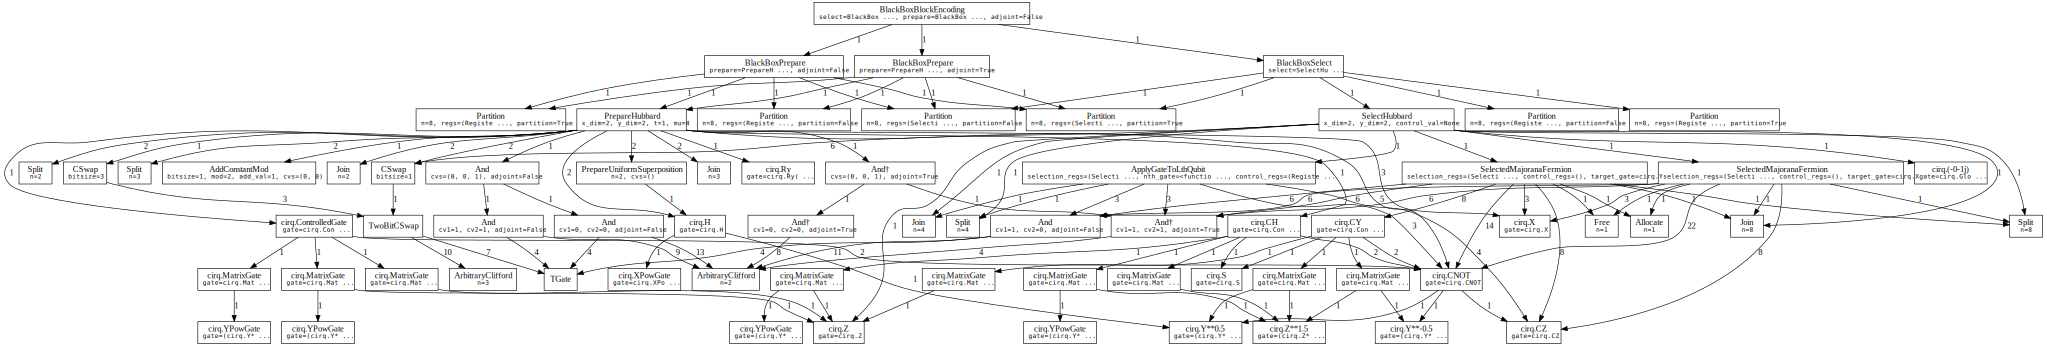

#### Counts totals:
 - `AddConstantMod(bitsize=1, mod=2, add_val=1, cvs=(0, 0))`: 2
 - `Allocate(n=1)`: 2
 - `ArbitraryClifford(n=2)`: 293
 - `ArbitraryClifford(n=3)`: 160
 - `CirqGateAsBloq(gate=(cirq.Y**-0.24999999999999992))`: 2
 - `CirqGateAsBloq(gate=(cirq.Y**-0.35241638234956674))`: 2
 - `CirqGateAsBloq(gate=(cirq.Y**-0.5))`: 81
 - `CirqGateAsBloq(gate=(cirq.Y**0.24999999999999992))`: 2
 - `CirqGateAsBloq(gate=(cirq.Y**0.35241638234956674))`: 2
 - `CirqGateAsBloq(gate=(cirq.Y**0.5))`: 89
 - `CirqGateAsBloq(gate=(cirq.Z**1.5))`: 20
 - `CirqGateAsBloq(gate=cirq.CZ)`: 93
 - `CirqGateAsBloq(gate=cirq.GlobalPhaseGate((-0-1j)))`: 1
 - `CirqGateAsBloq(gate=cirq.Ry(rads=2.0943951023931953))`: 2
 - `CirqGateAsBloq(gate=cirq.S)`: 10
 - `CirqGateAsBloq(gate=cirq.X)`: 12
 - `CirqGateAsBloq(gate=cirq.XPowGate(global_shift=-0.25))`: 8
 - `CirqGateAsBloq(gate=cirq.Z)`: 15
 - `Free(n=1)`: 2
 - `Join(n=2)`: 4
 - `Join(n=3)`: 4
 - `Join(n=4)`: 2
 - `Join(n=8)`: 3
 - `Partition(n=8, regs=(Register(name='target', bitsize=8, shape=(), side=<Side.THRU: 3>),), partition=False)`: 1
 - `Partition(n=8, regs=(Register(name='target', bitsize=8, shape=(), side=<Side.THRU: 3>),), partition=True)`: 1
 - `Partition(n=8, regs=(Register(name='temp', bitsize=2, shape=(), side=<Side.THRU: 3>),), partition=False)`: 2
 - `Partition(n=8, regs=(Register(name='temp', bitsize=2, shape=(), side=<Side.THRU: 3>),), partition=True)`: 2
 - `Partition(n=8, regs=(SelectionRegister(name='U', bitsize=1, iteration_length=2, shape=(), side=<Side.THRU: 3>), SelectionRegister(name='V', bitsize=1, iteration_length=2, shape=(), side=<Side.THRU: 3>), SelectionRegister(name='p_x', bitsize=1, iteration_length=2, shape=(), side=<Side.THRU: 3>), SelectionRegister(name='p_y', bitsize=1, iteration_length=2, shape=(), side=<Side.THRU: 3>), SelectionRegister(name='alpha', bitsize=1, iteration_length=2, shape=(), side=<Side.THRU: 3>), SelectionRegister(name='q_x', bitsize=1, iteration_length=2, shape=(), side=<Side.THRU: 3>), SelectionRegister(name='q_y', bitsize=1, iteration_length=2, shape=(), side=<Side.THRU: 3>), SelectionRegister(name='beta', bitsize=1, iteration_length=2, shape=(), side=<Side.THRU: 3>)), partition=False)`: 3
 - `Partition(n=8, regs=(SelectionRegister(name='U', bitsize=1, iteration_length=2, shape=(), side=<Side.THRU: 3>), SelectionRegister(name='V', bitsize=1, iteration_length=2, shape=(), side=<Side.THRU: 3>), SelectionRegister(name='p_x', bitsize=1, iteration_length=2, shape=(), side=<Side.THRU: 3>), SelectionRegister(name='p_y', bitsize=1, iteration_length=2, shape=(), side=<Side.THRU: 3>), SelectionRegister(name='alpha', bitsize=1, iteration_length=2, shape=(), side=<Side.THRU: 3>), SelectionRegister(name='q_x', bitsize=1, iteration_length=2, shape=(), side=<Side.THRU: 3>), SelectionRegister(name='q_y', bitsize=1, iteration_length=2, shape=(), side=<Side.THRU: 3>), SelectionRegister(name='beta', bitsize=1, iteration_length=2, shape=(), side=<Side.THRU: 3>)), partition=True)`: 3
 - `Split(n=2)`: 4
 - `Split(n=3)`: 4
 - `Split(n=4)`: 2
 - `Split(n=8)`: 3
 - `TGate()`: 188

In [5]:
black_box_block_bloq_g, black_box_block_bloq_sigma = black_box_block_bloq.call_graph()
show_call_graph(black_box_block_bloq_g)
show_counts_sigma(black_box_block_bloq_sigma)